<a href="https://colab.research.google.com/github/Subhasish-Negel/apprating_prediction/blob/main/Play_Store_Ratings_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries and the dataset 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading the Data
df = pd.read_csv('googleplaystore.csv')
df.sample(13)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3934,Microsoft Word,PRODUCTIVITY,4.5,2078744,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"July 11, 2018",16.0.10325.20043,4.4 and up
9759,Virtual Brain Surgery Simulator : Kid ER Emerg...,FAMILY,3.8,20,55M,"5,000+",Free,0,Teen,Educational,"February 23, 2018",1.1,4.0 and up
2302,palmPEDi: Pediatric Tape,MEDICAL,4.6,66,2.6M,"5,000+",Paid,$0.99,Everyone,Medical,"December 2, 2013",4.1,3.2 and up
8342,DF SmartPlus,TOOLS,NaN,0,36M,10+,Free,0,Everyone,Tools,"February 23, 2018",1.0.1,4.1 and up
5920,Ba ba black sheep offline Video,PARENTING,4.2,20,17M,"10,000+",Free,0,Everyone,Parenting,"July 2, 2017",1.1,4.0.3 and up
4555,R Studio,SHOPPING,3.7,23,8.9M,"5,000+",Free,0,Everyone,Shopping,"July 8, 2016",2.1.1,4.0.3 and up
10743,FP BW LCD View,FAMILY,3.4,16,1.2M,500+,Free,0,Everyone,Entertainment,"March 31, 2016",1.0,4.0.3 and up
5804,INTERACTIVE CALCULUS PRO,FAMILY,NaN,0,3.3M,10+,Paid,$0.99,Everyone,Education,"February 22, 2018",1.2,4.0.3 and up
3847,Snapp,MAPS_AND_NAVIGATION,4.5,37937,25M,"1,000,000+",Free,0,Everyone,Maps & Navigation,"August 1, 2018",3.6.7,4.0.3 and up
660,Dating Tips For Men,DATING,NaN,0,7.8M,10+,Free,0,Everyone,Dating,"July 9, 2018",3.0,4.0.3 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Columns to be removed
As we can see, the app name is not required as it's a unique column, also there's no need for Current App version & Android version as for Current App version it's not like one app has different rating on different version and for Android Version, the apps are installed on only supported android version in the first place, and for that reason the Last Updated columns is also going to be removed.

In [ ]:
df.drop(columns=['App', 'Current Ver', 'Android Ver', 'Last Updated'], inplace=True)
df.sample(13)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
274,BUSINESS,3.5,2111,Varies with device,"100,000+",Free,0,Everyone,Business
6407,COMICS,4.8,33783,6.4M,"1,000,000+",Free,0,Teen,Comics
10226,VIDEO_PLAYERS,4.5,1060,3.2M,"100,000+",Free,0,Everyone,Video Players & Editors
1734,GAME,4.5,10434,18M,"1,000,000+",Free,0,Everyone,Arcade
4353,PHOTOGRAPHY,4.4,758780,53M,"50,000,000+",Free,0,Everyone,Photography
4602,COMMUNICATION,4.5,7820775,Varies with device,"100,000,000+",Free,0,Everyone,Communication
282,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business
4605,TOOLS,3.6,41502,Varies with device,"50,000,000+",Free,0,Everyone,Tools
5934,LIFESTYLE,3.9,592,2.5M,"100,000+",Free,0,Everyone,Lifestyle
9103,PRODUCTIVITY,4.4,457,562k,"50,000+",Free,0,Everyone,Productivity


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


In [ ]:
df['Category'].nunique(), df['Genres'].nunique()

(34, 120)

In [ ]:
df[['Category', 'Genres']].sample(13)

,Category,Genres
3620,PARENTING,Parenting;Music & Video
4590,TOOLS,Tools
7561,TOOLS,Tools
9643,BOOKS_AND_REFERENCE,Books & Reference
6115,TOOLS,Tools
10684,GAME,Action
9538,FAMILY,Simulation
2603,SOCIAL,Social
902,ENTERTAINMENT,Entertainment
294,BUSINESS,Business


#### Category vs Genres

As we can see, Category & Genres are more or less same except the Game category has many other sub-genres, so we are going to remove the category column and drop the genres column

In [ ]:
df.drop(columns=['Genres'], inplace=True)
df.sample(13)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
9484,GAME,3.5,3048,24M,"500,000+",Free,0,Teen
386,COMMUNICATION,4.0,3419433,Varies with device,"1,000,000,000+",Free,0,Everyone
1519,LIBRARIES_AND_DEMO,NaN,26,10M,"10,000+",Free,0,Everyone
8954,FAMILY,4.3,21,2.5M,"1,000+",Free,0,Everyone
658,DATING,NaN,0,4.4M,10+,Free,0,Mature 17+
8764,GAME,4.6,15829,95M,"1,000,000+",Free,0,Everyone
10354,TRAVEL_AND_LOCAL,NaN,1,22M,100+,Free,0,Everyone
10606,PRODUCTIVITY,NaN,0,22M,100+,Free,0,Everyone
8418,GAME,3.7,38767,4.1M,"5,000,000+",Free,0,Everyone 10+
295,BUSINESS,4.5,413,29M,"10,000+",Free,0,Everyone


### Optimizing 'Size' Column

In [ ]:
df['Size'].sample(15)

7413                    43M
2577                   2.8M
6074                   3.6M
1225                   7.2M
3472                    15M
3956                   8.9M
4912                    18M
8777                    46M
6726                    94M
3014                    34M
8474                    87M
365      Varies with device
3294     Varies with device
10222                  1.5M
1203     Varies with device
Name: Size, dtype: object

In [ ]:
df['Size'] = df['Size'].str.replace('M', 'e6')
df['Size'] = df['Size'].str.replace('k', 'e3')

In [ ]:
df['Size'].value_counts(ascending=False)

Varies with device    1695
11e6                   198
12e6                   196
14e6                   194
13e6                   191
                      ... 
429e3                    1
200e3                    1
460e3                    1
728e3                    1
619e3                    1
Name: Size, Length: 462, dtype: int64

In [ ]:
# df.Size[df.Size == 'Varies with device'] = np.nan
df.loc[df.Size == 'Varies with device', 'Size'] = np.nan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            9146 non-null   object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
dtypes: float64(1), object(7)
memory usage: 677.7+ KB


In [ ]:
# Checking for duplicate values
df.duplicated().sum()

544

In [ ]:
# Removing Duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10297 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10297 non-null  object 
 1   Rating          8888 non-null   float64
 2   Reviews         10297 non-null  object 
 3   Size            8775 non-null   object 
 4   Installs        10297 non-null  object 
 5   Type            10296 non-null  object 
 6   Price           10297 non-null  object 
 7   Content Rating  10296 non-null  object 
dtypes: float64(1), object(7)
memory usage: 724.0+ KB


#### Missing value in Type & Content Rating column
Let's Check what is missing!

In [ ]:
df[df['Type'].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
9148,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+


In [ ]:
df[df['Content Rating'].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN


it looks suspicious, let's remove both.

In [ ]:
df.drop(df[df['Type'].isnull()].index, inplace=True)
df.drop(df[df['Content Rating'].isnull()].index, inplace=True)
df.sample(13)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10595,FAMILY,4.5,65,470e3,"5,000+",Free,0,Everyone
3027,SPORTS,4.1,19230,88e6,"1,000,000+",Free,0,Everyone
5941,TOOLS,1.9,8,6.7e6,"1,000+",Free,0,Everyone
4477,PERSONALIZATION,5.0,1,60e6,100+,Paid,$0.99,Everyone
7941,BUSINESS,4.6,213,3.8e6,"10,000+",Free,0,Everyone
339,COMMUNICATION,4.4,1429035,NaN,"100,000,000+",Free,0,Everyone
9150,FAMILY,4.0,69574,45e6,"500,000+",Free,0,Everyone 10+
10732,TOOLS,4.3,3268,467e3,"100,000+",Free,0,Everyone
3858,MAPS_AND_NAVIGATION,4.2,23279,8.5e6,"1,000,000+",Free,0,Everyone
7028,FAMILY,4.6,1977,3.8e6,"100,000+",Free,0,Everyone


In [ ]:
# Converting the Size column from object to numeric

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10295 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10295 non-null  object 
 1   Rating          8887 non-null   float64
 2   Reviews         10295 non-null  object 
 3   Size            8774 non-null   float64
 4   Installs        10295 non-null  object 
 5   Type            10295 non-null  object 
 6   Price           10295 non-null  object 
 7   Content Rating  10295 non-null  object 
dtypes: float64(2), object(6)
memory usage: 723.9+ KB


#### Handling Missing Values

As we can see there are some missing values on the 'Rating' & 'Size' column
We are going to fill those by imputing missing values in the 'Rating' & 'Size' column based on the mean of each particular category in the "Category" column. This approach allows us to fill the missing values with category-specific means, which can help capture the variability within each category.

In [ ]:
category_rating_means = df.groupby('Category')['Rating'].mean()
category_size_means = df.groupby('Category')['Size'].mean()

# Iterate over the DataFrame rows
for index, row in df.iterrows():
    category = row['Category']
    if pd.isnull(row['Rating']):
        mean_rating = category_rating_means.get(category)
        df.loc[index, 'Rating'] = mean_rating
    if pd.isnull(row['Size']):
        mean_size = category_size_means.get(category)
        df.loc[index, 'Size'] = mean_size

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10295 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10295 non-null  object 
 1   Rating          10295 non-null  float64
 2   Reviews         10295 non-null  object 
 3   Size            10295 non-null  float64
 4   Installs        10295 non-null  object 
 5   Type            10295 non-null  object 
 6   Price           10295 non-null  object 
 7   Content Rating  10295 non-null  object 
dtypes: float64(2), object(6)
memory usage: 981.9+ KB


In [ ]:
# normalizing the 'Installs' & 'Price' column
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]
df['Price'] = df['Price'].str.replace('$', '', regex=False)

# Changing the 'price' & 'Reviews' column to numeric from object
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Changing the 'Type' column to a Boolean column
df['Type'] = (df['Type'] == 'Paid').astype(int)

# One hot encoding the 'Content Rating' column
one_hot_encoded = pd.get_dummies(df['Content Rating'], prefix='Rating')
df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop('Content Rating', axis=1)
df.sample(7)

,Category,Rating,Reviews,Size,Installs,Type,Price,Rating_Adults only 18+,Rating_Everyone,Rating_Everyone 10+,Rating_Mature 17+,Rating_Teen,Rating_Unrated
9820,COMMUNICATION,4.151466,6,2700000.0,500,0,0.0,0,1,0,0,0,0
9272,FAMILY,3.600000,496,14000000.0,100000,0,0.0,0,1,0,0,0,0
9882,FAMILY,4.191846,8,7200000.0,100,0,0.0,0,1,0,0,0,0
702,EDUCATION,4.600000,85375,21000000.0,5000000,0,0.0,0,1,0,0,0,0
7317,NEWS_AND_MAGAZINES,4.128505,0,3400000.0,100,0,0.0,0,0,0,0,1,0
8203,LIBRARIES_AND_DEMO,4.500000,23,31000000.0,5000,0,0.0,0,1,0,0,0,0
5139,MEDICAL,5.000000,1,27000000.0,100,0,0.0,0,1,0,0,0,0


In [ ]:
# Checking for any null values
df.isnull().sum()

Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Rating_Adults only 18+    0
Rating_Everyone           0
Rating_Everyone 10+       0
Rating_Mature 17+         0
Rating_Teen               0
Rating_Unrated            0
dtype: int64

<Axes: >

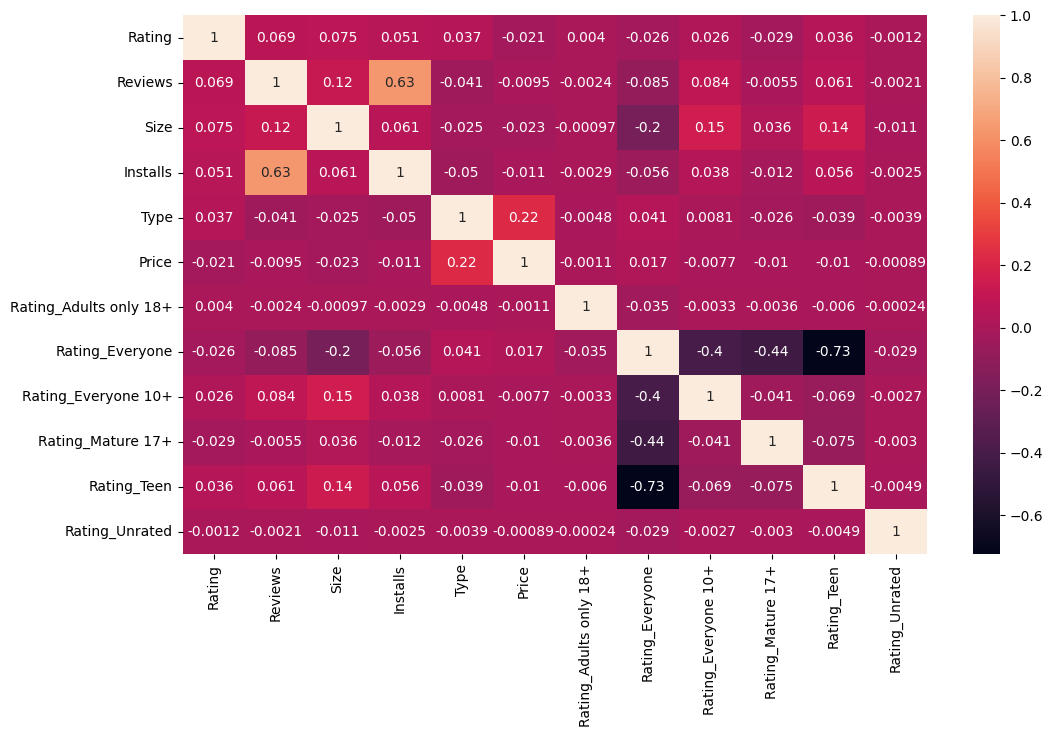

In [ ]:
# Checking multicollinearity using correlation visualizing on Seaborn heatmap
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 10})

In [ ]:
df['Category'].nunique()

33

In [ ]:
# As we can see there are 31 unique values in the 'Category' variable, so we will be using Count encoding.
count_encoding = df['Category'].value_counts()
df['Category'] = df['Category'].map(count_encoding)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10295 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                10295 non-null  int64  
 1   Rating                  10295 non-null  float64
 2   Reviews                 10295 non-null  int64  
 3   Size                    10295 non-null  float64
 4   Installs                10295 non-null  int64  
 5   Type                    10295 non-null  int64  
 6   Price                   10295 non-null  float64
 7   Rating_Adults only 18+  10295 non-null  uint8  
 8   Rating_Everyone         10295 non-null  uint8  
 9   Rating_Everyone 10+     10295 non-null  uint8  
 10  Rating_Mature 17+       10295 non-null  uint8  
 11  Rating_Teen             10295 non-null  uint8  
 12  Rating_Unrated          10295 non-null  uint8  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 961.8 KB


In [ ]:
df.sample(7)

,Category,Rating,Reviews,Size,Installs,Type,Price,Rating_Adults only 18+,Rating_Everyone,Rating_Everyone 10+,Rating_Mature 17+,Rating_Teen,Rating_Unrated
3857,137,4.5,44348,11000000.0,5000000,0,0.00,0,1,0,0,0,0
4834,384,4.8,201,68000000.0,1000,1,1.49,0,1,0,0,0,0
1077,359,4.6,510392,79000000.0,10000000,0,0.00,0,1,0,0,0,0
4553,839,4.8,17,6700000.0,50,0,0.00,0,1,0,0,0,0
5040,1935,4.3,726,19000000.0,5000,1,4.99,0,1,0,0,0,0
4112,839,4.3,3943,11000000.0,100000,0,0.00,0,1,0,0,0,0
6057,384,4.6,838,11000000.0,50000,0,0.00,0,0,0,0,1,0


## Creating Model

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Split the data into training and test sets
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)



RandomForestRegressor()

## Prediction

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Checking the accuracy of the model

from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 0.31
MSE: 0.21
RMSE: 0.46


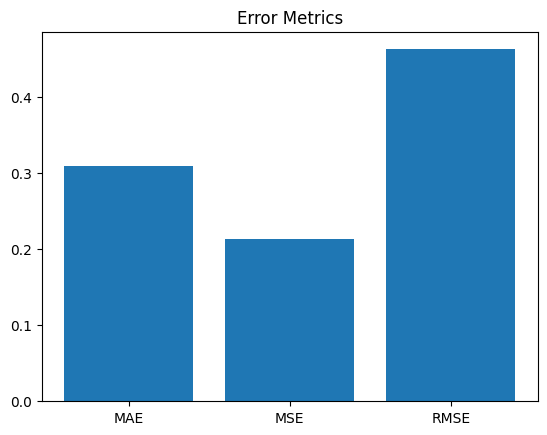

In [ ]:
# Create a list of metric names and values
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]

# Create a bar plot
plt.bar(metrics, values)
plt.title('Error Metrics')
plt.show()

<Axes: xlabel='Rating', ylabel='Count'>

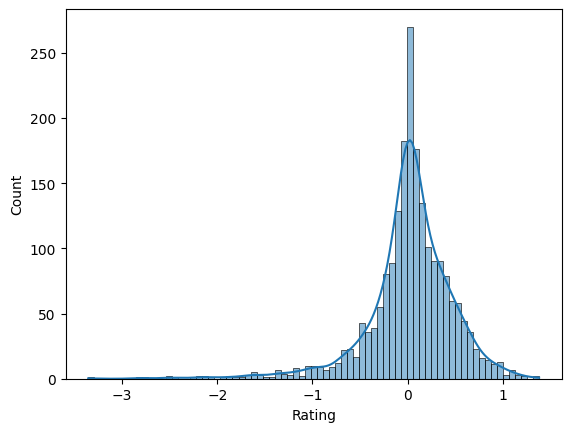

In [ ]:
# Visualizing how many errors our model has
residuals = y_test - model.predict(X_test)
sns.histplot(residuals, stat='count', kde=True)

#### As we can see, the errors are very low and the model is pretty much accurate by this histplot.